#### <font color='LightCoral'> **ЗАДАНИЕ 6.** Реализация пакета модулей для манипулирования плоскими фигурами.

Реализовать API, которое позволяет генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: `((0,0), (0,1), (1,1), (1,0))` — представление для квадрата). Последовательности представлений полигонов представляют собой итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля `itertools` и `functools`.

In [2]:
import matplotlib.pyplot as plt

import math as m
import itertools as it
import functools as ft
from shapely.geometry import Polygon
from sympy import Point

from copy import copy
from typing import Tuple, Iterable, Union

Суммарная сложность дополнительных заданий должна быть не менее 5.

1.	Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки `matplotlib`, см. пример: [ссылка](https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py)).

<font color="Crimson">**обязательная часть**

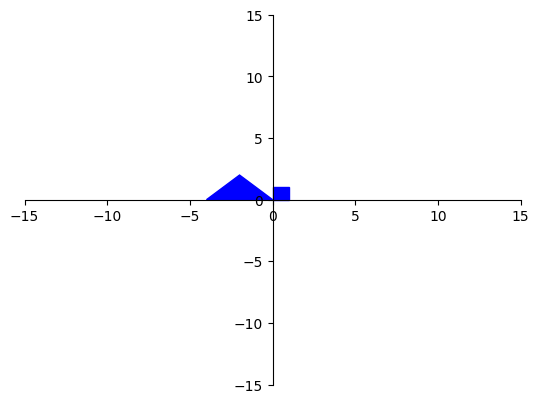

In [7]:
def draw_polygons(coords):
    # Функция для отрисовки фигур на графике. Принимает на вход список координат фигур.
    for shape in coords:
        x, y = zip(*shape)
        plt.fill(x, y, color='blue')
    xy = plt.gca()
    # Получаем оси графика
    xy.spines['left'].set_position('zero')
    xy.spines['bottom'].set_position('zero')
    xy.spines['right'].set_color('none')
    xy.spines['top'].set_color('none')
    plt.xlim((-15, 15))
    # Устанавливаем пределы по оси x от -15 до 15
    plt.ylim((-15, 15))
    # Устанавливаем пределы по оси y от -15 до 15

coord = iter((((-4, 0), (-2, 2), (0, 0)), ((0, 0), (1, 0), (1, 1), (0, 1))))
draw_polygons(coord)


2.	Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

* прямоугольников (`gen_rectangle`);

* треугольников (`gen_triangle`);

* правильных шестиугольников (`gen_hexagon`).

* с помощью данных функций используя функции из модуля `itertools` сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

<font color="Crimson">**обязательная часть**


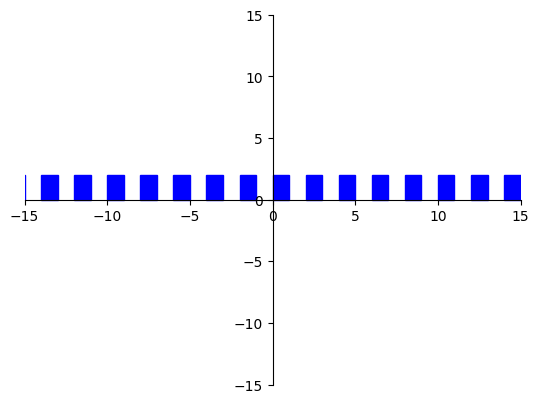

In [8]:
def gen_rectangle(length=2, width=2, start=-25, count=100):
    x1 = it.islice(it.count(start, length), count)
    # Генерируем координаты x для левого верхнего угла прямоугольника,начиная с заданной начальной координаты и с шагом, равным длине прямоугольника.
    x2 = it.islice(it.count(start - 1, length), count)
    # Генерируем координаты x для правого верхнего угла прямоугольника
    y1 = it.islice(it.repeat(width), count)
    # Генерируем координаты y для верхней грани прямоугольника,повторяя значение ширины прямоугольника заданное количество раз.
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для нижней грани прямоугольника,повторяя значение 0 заданное количество раз.
    return (
        ((_x1, _y1), (_x2, _y1), (_x2, _y2), (_x1, _y2))
        for _x1, _x2, _y1, _y2 in zip(x1, x2, y1, y2)
    )
    # Возвращаем генератор, который выдает кортежи с координатами вершин прямоугольников.

draw_polygons(gen_rectangle())

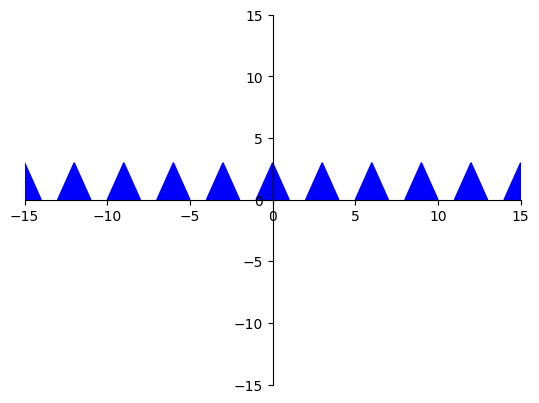

In [13]:
def gen_triangle(length=3, height=3, start=-25, count=100):
    x1 = it.islice(it.count(start, length), count)
    # Генерируем координаты x для первой вершины треугольника
    x2 = it.islice(it.count(start + 1, length), count)
    # Генерируем координаты x для второй вершины треугольника
    x3 = it.islice(it.count(start + 2, length), count)
    # Генерируем координаты x для третьей вершины треугольника
    y1 = it.islice(it.repeat(height), count)
    # Генерируем координаты y для верхней грани треугольника
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для основания треугольника
    return iter([((x1_, y2_), (x2_, y1_), (x3_, y2_))
        for x1_, x2_, x3_, y1_, y2_ in zip(x1, x2, x3, y1, y2)]
    )
    # Возвращаем итератор, который выдает кортежи с координатами вершин треугольников.

draw_polygons(gen_triangle())

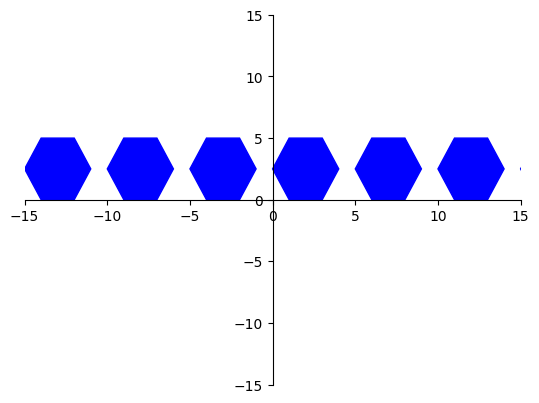

In [9]:
def gen_hexagon(length=5, height=5, start=-25, count=100):
    x1 = it.islice(it.count(start=start, step=length), count)
    # Генерируем координаты x для первой вершины шестиугольника
    x2 = it.islice(it.count(start=start + 1, step=length), count)
    x3 = it.islice(it.count(start=start + 3, step=length), count)
    x4 = it.islice(it.count(start=start + 4, step=length), count)
    y1 = it.islice(it.repeat(height), count)
    # Генерируем координаты y для верхней грани шестиугольника
    y2 = it.islice(it.repeat(0), count)
    # Генерируем координаты y для нижней грани шестиугольника
    y3 = iter([i / 2 for i in copy(y1)])
    # Генерируем координаты y для средней грани шестиугольника
    itr = []
    for _ in range(count):
        _x1, _x2, _x3, _x4 = next(x1), next(x2), next(x3), next(x4)
        # Берем следующие значения координат x для всех четырех вершин
        _y1, _y2, _y3 = next(y1), next(y2), next(y3)
        # Берем следующие значения координат y для всех трех граней
        itr.append(list(zip((_x1, _x2, _x3, _x4, _x3, _x2), (_y3, _y1, _y1, _y3, _y2, _y2))))
        # Формируем координаты вершин шестиугольника и добавляем их в список

    return itr
    # Возвращаем список с координатами вершин для всех шестиугольников

draw_polygons(gen_hexagon())

In [ ]:
draw_polygons(gen_rectangle(start=8, count=2))
draw_polygons(gen_triangle(start=-2, count=3))
draw_polygons(gen_hexagon(start=-12, count=2))

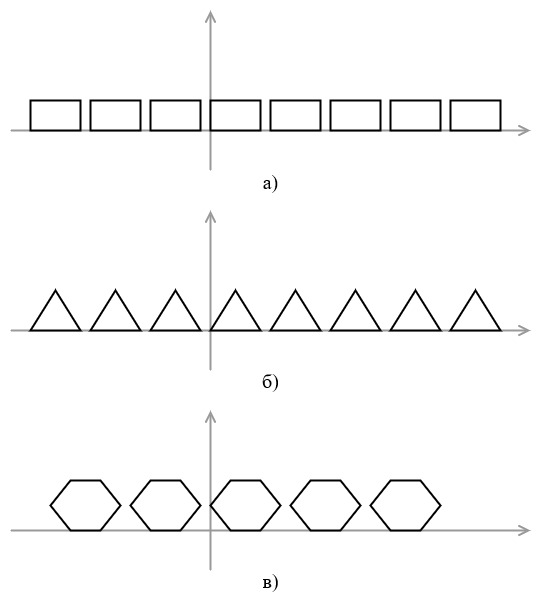

Рисунок 2 — Последовательности непересекающихся полигонов

3.	Реализовать операции:

* параллельный перенос (`tr_translate`);

* поворот (`tr_rotate`);

* симметрия (`tr_symmetry`);

* гомотетия (`tr_homothety`);

которые можно применить к последовательности полигонов с помощью функции `map`.

<font color="Crimson">**обязательная часть**


In [10]:
def tr_translate(coordinates, move_y=6, move_x=0):
    # Создаем пустой список fig, в который будем добавлять координаты перемещенных фигур
    fig = []
    for figure in coordinates:
        x, y = zip(figure)
        # Перемещаем все y-координаты вверх на значение move_y
        y = [_y + move_y for _y in y]
        # Перемещаем все x-координаты вправо на значение move_x
        x = [_x + move_x for _x in x]
        for x, y in zip(x, y):
            fig.append((x, y))
    return fig

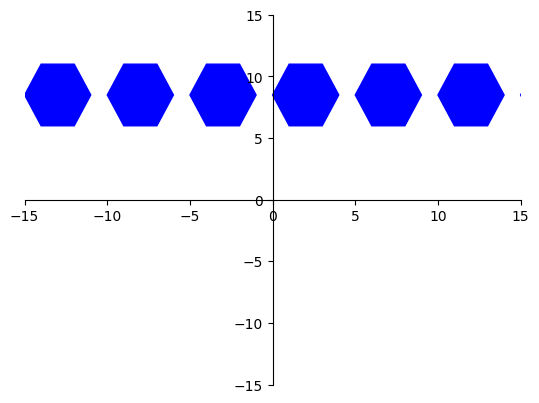

In [11]:
draw_polygons(map(tr_translate, gen_hexagon()))

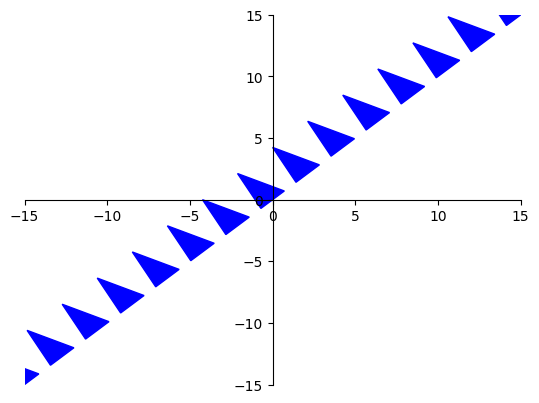

In [19]:
def tr_rotate(coordinates, angle=45):
    # Создаем пустой список n, в который будем добавлять координаты повернутых точек
    n = []
    for point in coordinates:
        x, y = point
        # Вычисляем косинус угла
        cos = m.cos(m.radians(angle))
        sin = m.sin(m.radians(angle))
        # Вычисляем новую x-координату после поворота
        _x = x * cos - y * sin
        # Вычисляем новую y-координату после поворота
        _y = x * sin + y * cos
        n.append((_x, _y))
    return n
draw_polygons(map(tr_rotate, gen_triangle()))

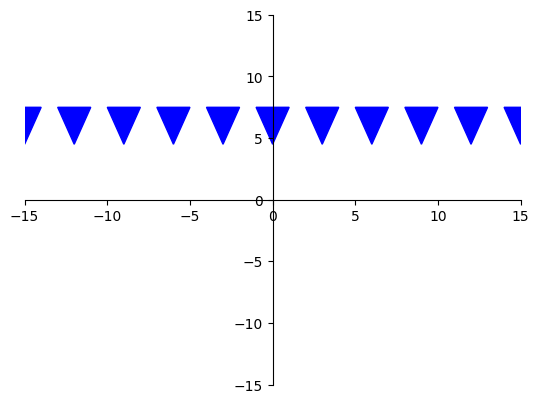

In [17]:
def tr_symmetry(coordinates):
    # Создаем отображение смещения точек вверх
    # Используем ft.partial, чтобы зафиксировать значения аргументов move_up и move_sideways
    # move_y устанавливаем в -7.5 для смещения вверх
    n = map(ft.partial(tr_translate, move_y=-7.5), [coordinates])
    # Поворачиваем фигуру на 180 градусов
    result = [i for i in map(ft.partial(tr_rotate, angle=180), n)][0]
    return result
draw_polygons(map(tr_symmetry, gen_triangle()))

4.	С помощью данных функций создать и визуализировать (рис. 3):

* три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

* две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

* две параллельных ленты треугольников, ориентированных симметрично друг к другу;

* последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

<font color="Crimson">**обязательная часть**

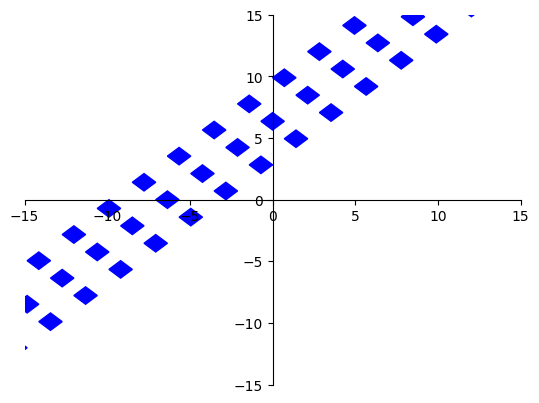

In [20]:

draw_polygons(map(tr_rotate, map(tr_translate, gen_rectangle(length=3, width=1))))
draw_polygons(map(tr_rotate, map(ft.partial(tr_translate, move_y=2), gen_rectangle(3, 1))))
draw_polygons(map(tr_rotate, map(ft.partial(tr_translate, move_y=4), gen_rectangle(3, 1))))

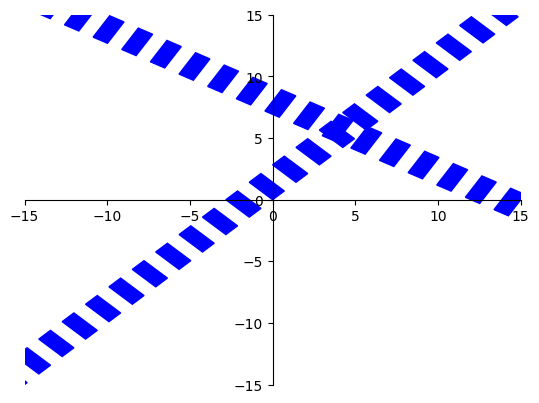

In [21]:

draw_polygons(map(tr_rotate, gen_rectangle()))
draw_polygons(map(ft.partial(tr_rotate, angle=-30), map(tr_translate, gen_rectangle())))

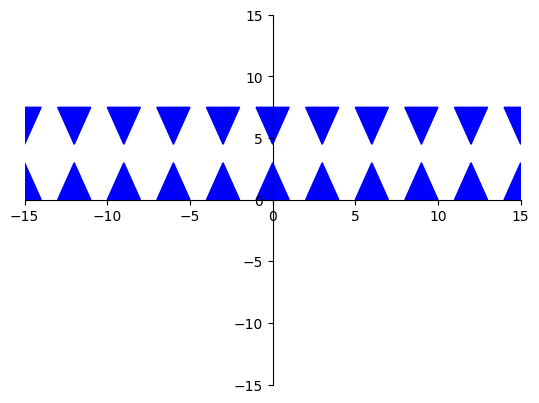

In [22]:
draw_polygons(gen_triangle())
draw_polygons(map(tr_symmetry, gen_triangle()))

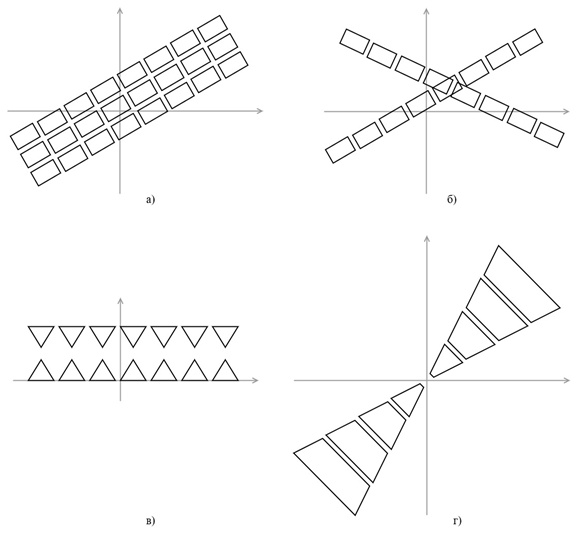

Рисунок 3 — Реализация операции параллельного переноса (а), поворота (б),
симметрии (в) и гомотетии (г)

5.	Реализовать операции:

* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

<font color="Crimson">**обязательная часть: 2 пункта<br>4 пункта — сложность 1<br>6 пунктов — сложность 2**


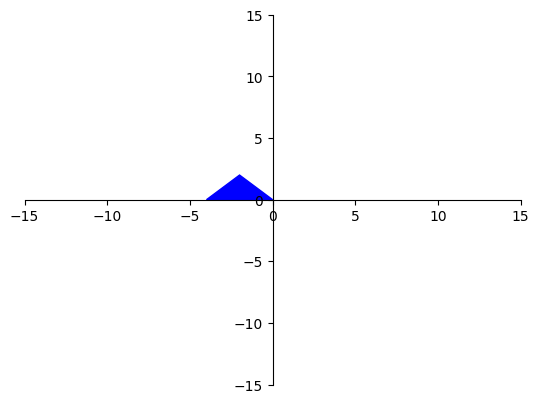

In [23]:
def flt_square(coordinates, area = 2):
    # Функция flt_square принимает список координат (coordinates) и необязательный порог площади (area)

    return True if Polygon(coordinates).area > area else False
    # Создаем объект Polygon из библиотеки shapely, используя переданные координаты.
coord = iter((
    # Создаем итератор для перебора фигур
    ((-4, 0), (-2, 2), (0, 0)),
    # Координаты вершин первой фигуры: площадь > 2
    ((2, 0), (3, 0), (3, 1), (2, 1))))
    # Координаты вершин второй фигуры: площадь <= 2
draw_polygons(filter(flt_square, coord))

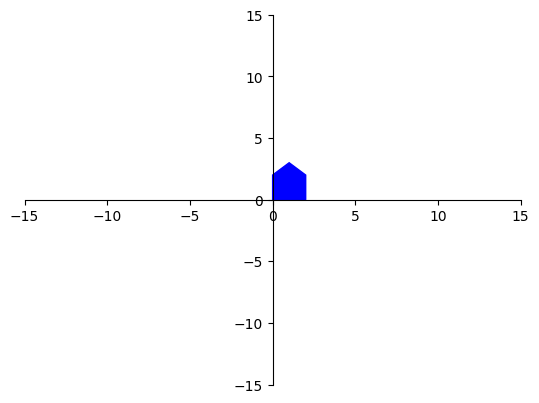

In [24]:
def flt_convex_polygon(coordinates):
    # Создаем многоугольник из заданных вершин
    polygon = Polygon(coordinates)
    # Сравниваем многоугольник с его выпуклой оболочкой (convex_hull.equals)
    if polygon.convex_hull.equals(polygon):
        return True
    return False
coord = iter((
    # Создаем итератор для перебора фигур
    ((0, 0), (2, 0), (2, 2), (1, 3), (0, 2)),
    # Координаты вершин первой фигуры: выпуклого многоугольника
    ((-5, 0), (-3, 0), (-4, 1), (-3, 2), (-5, 2))))
    # Координаты вершин второй фигуры: невыпуклого многоугольника
draw_polygons(filter(flt_convex_polygon, coord))